In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

### 인공신경망(Artificial Neural Networks, ANN)
- 사람의 뇌 구조를 복제해 입력과 출력 신호 간의 관계를 모델링하는 기법으로 사람이 감각을 통해 입력된 자극에 관해 반응하는 원리를 따라한 것이다.
- 작동 원리
    - 각 뉴런은 입력 부분을 갖고 각 입력에는 가중값이 주어진다. 뉴련은 이 가중 입력을 함수로 계산한다. 
    - 선형 뉴런은 가중 입력의 선형 조합을 입력으로 받아 그 총합에 활성 함수(activation function)(시그모이드, 하이퍼볼릭 탄젠트, 렐루 등)를 적용한다
    - 망은 입력의 가중 합을 로지스틱 함수에 전달한다(시그모이드 함수의 경우). 로지스틱 함수는 설정된 임계값에 따라 0이나 1을 반환한다.

#### 활성 함수(activation function)
인공 뉴런이 정보를 가공하고 망을 통해 전달하는 도구다. 단일 숫자를 입력으로 받아 고정된 수학적 매핑을 수행한다.
- 시그모이드 함수(sigmoid)
    - 실수를 0과 1사이 값으로 변환한다. 미분 계산이 쉽고 해석이 용이해 자주 사용된다.
- 하이퍼볼릭 탄젠트 함수(Tanh)
    - 실수를 -1과 1 사이의 값으로 만든다. 실제 활용에 있어서는 tanh의 비선형성이 시그모이드보다 항상 더 선호된다.
- 렐루(Rectified Linear Unit, ReLu)
    - 입력이 0 이하면 0이고, 임계값인 0을 넘기면 바로 활성화된다. f(x) = max(0, x)
- 선형 함수
    - 선형 회귀 문제에서 사용된다. 미분값은 항상 1이 된다. f(x) = x
    
ReLU는 시그모이드나 Tanh에 비해 수렴 성질이 뛰어나기 때문에 두 함수 대신 많이 이용된다. 선형 활성 함수는 선형 회귀에 사용되는 반면, 다른 모든 활성 함수는 분류 문제에 사용된다.

#### 순전파(Forward propagation와 역전파(backpropagation)
입력층의 뉴런 개수는 독립 변수 x에 달려 있고, 출력층의 뉴런 개수는 모델이 예측하려는 부류의 수에 달려 있다.

가중값과 편향값은 난수를 사용해 초기화한다. 이후에 순방향과 역방향 경로 모두에서 오차를 최소화하기 위한 값의 갱신이 일어난다.
- 순전파가 일어나는 동안 특징값이 망에 입력되고 그 다음 층에 전달돼 출력을 활성화한다.
- 전체 값이 임계값을 넘어서면 그 다음 층으로 전파되고, 그렇지 못하면 그 다음 층으로의 신호값은 0이 된다. 경우에 따라 가중 조합 신호가 너무 낮으면 편형 가중값을 이용해 신호를 증폭해 다음 단계로 전파될 수 있도록 한다.
- 비슷한 방법으로 은닉층들을 지나고 마지막 층(출력층)에서도 비슷한 방법으로 가중 출력과 편향 가중값을 조합해 출력을 계산한다.
- 모델의 출력값을 얻고 나면 실제값과 비교한 후, 망을 통해 오차를 역전파하면서 전체 신경망의 가중값들을 수정한다.
- 값이 수렴하거나 설정한 반복 횟수에 도달될 때까지 가중값을 반복적으로 갱신한다.

#### 신경망의 최적화
신경망의 가중값을 최적화하는 데 사용되는 기술

<strong>실제 적용에서는 아담을 디폴트로 선택하는 것이 좋다.</strong> 전체 일괄 처리 형태로 갱신할 수 있는 여유가 없으면 L-BFGS를 사용하는 것도 좋다
- 확률 경사 하강법(Stochastic Gradient Descent, SGD)
- 모멘텀(Momentum)
    - 공을 언덕 아래로 굴리는 것과 같다.
    - 경사의 방향이 같을 때는 점점 증가하다가 경사의 방향이 바뀌는 차원에 관해서는 갱신을 줄인다. 결과적으로 수렴을 빨라지고 진동은 줄어든다.
- NAG(Nesterov accelerated gradient)
    - 먼저 이전 누적 경사 방향으로 큰 점프를 한 후, 수정한다. 이러한 선제적 갱신은 볼이 너무 빨리 구르는 것을 방지하고 반응성과 성능을 향상시킨다.
- 에이다 그래드(Adagrad)
    - 경사법 기반의 최적화 알고리즘으로 매개변수별로 차등화된 학습률을 적용한다.
    - 빈번한 매개변수는 작은 갱신값을 적용하고, 빈도가 낮은 매개변수는 상대적으로 큰 갱신값을 적용한다.
    - SGD의 안정성을 크게 향상시키고 대형 신경망의 훈련에 이용된다.
    - 장점 중 하나는 학습률을 수작업으로 갱신할 필요가 없다는 것이다. 대부분의 구현에서 디폴트 값인 0.01을 그대로 둔다.
    - 단점은 모든 합산이 양수이므로 훈련 기간 동안의 누적 합산은 커져만 간다는 것이다. 이 점은 결국 학습률을 계속 축소시켜 극히 작은 값이 되는 순간, 더 이상 알고리즘이 새로운 지식을 얻지 못한다 
- 에이다 델타(Adadelta)
    - 에이다 그래드의 확장으로 과거의 제곱된 경사도를 모두 축적하는 대신, 과거 경사도의 누적을 고정된 창으로 제한한 범위 w이내로 국한시킨다.
- RMS프랍(RMSprop)
- 아담(Adaptive moment estimation, Adam)
    - 각 매개변수의 적응 학습률을 계산하는 또 다른 방법 
    - <strong>판단이 잘 서지 않을 경우에는 그냥 아담을 사용한다</strong>
- L-BFGS(Limited memory Broyden-Fetcher-Goldfarb-Shanno)
    - 제한된 메모리를 사용하는 BFGS로, BFGS 알고리즘을 근사하는 모의 뉴턴 기법의 일종이다. 컴퓨터 메모리의 일부분만을 사용한다.

#### 신경망에서의 드롭아웃(Dropout)
- 데이터의 과적합을 피하기 위한 신경망의 정규화 과정이다. 통상 초기 계층에서는 0.2가 드롭아웃되고, 중간 계층에서는 0.5가 된다.
- 직관적 예시
    - 사내 일부 팀원은 대 고객 상담이 원활하지만 기술에 관한 깊이가 부족하다.
    - 반면 일부 팀원은 기술에 관한 해박한 지식을 갖고 있지만 대 고객 상담 능력은 부족하다.
    - 일부 팀원이 휴가를 가서(Dropout) 다른 팀원이 일을 대신해야 하는 경우 대 고객 상담만 뛰어났던 일부 팀원은 기술에 관한 세부를 더 배우는 계기가 될 수 있고, 기술에만 뛰어났던 일부 직원은 대 고객 상담 기술이 향상되는 계기가 될 수 있다.
    - 팀원 전체가 개별적으로 모든 형태의 업무를 안정적으로 하게 되어 회사에 큰 도움이 될 것이다

### 기존의 모델로는 XOR를 구분할 수 없다 -> 다층 퍼셉트론으로 해결

In [39]:
# XOR 데이터
x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_data = np.ravel([[0], [1], [1], [0]])

In [40]:
x_data[:, 0], x_data[:, 1]

(array([0, 0, 1, 1]), array([0, 1, 0, 1]))

In [41]:
y_data

array([0, 1, 1, 0])

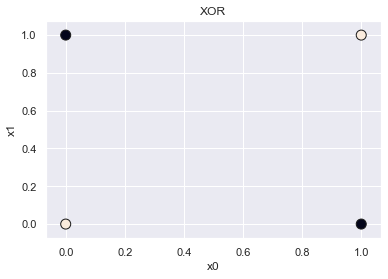

In [42]:
# 데이터 시각화
plt.title('XOR')
plt.scatter(x_data[:, 0], x_data[:, 1], c=~y_data, edgecolors='k', s=100)
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

색칠된 부분이 1 -> 두 입력 데이터 값이 다를 때 1

하나의 선을 그어 흰색과 검은색 부분을 구분할 수 없다

### Logistic Regression 

In [43]:
# 학습
model_logi = LogisticRegression()
model_logi.fit(x_data, y_data)

LogisticRegression()

In [44]:
# 예측
y_pred = model_logi.predict(x_data)
y_pred

array([0, 0, 0, 0])

모두 0으로 예측 -> 오답

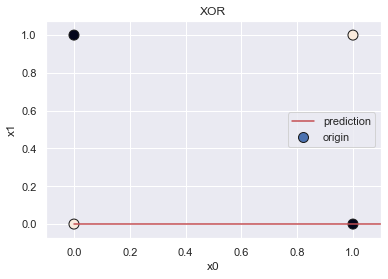

In [45]:
# 시각화
plt.title('XOR')
plt.scatter(x_data[:, 0], x_data[:, 1], c=~y_data, edgecolors='k', s=100, label='origin')
plt.xlabel('x0')
plt.ylabel('x1')
plt.plot(y_pred, c='r', label='prediction')
plt.xlim(-0.1, 1.1)
plt.legend()
plt.show()

Logistic Regression 모델로 예측 불가

### MLP Classifier
- 은닉층을 만들어 좌표 평면을 왜곡시킨 후 선을 그어 구분한다

In [46]:
# 학습
model_NN = MLPClassifier() # default hidden_layer_sizes=(100,)
model_NN.fit(x_data, y_data)

MLPClassifier()

In [47]:
# 예측
y_pred = model_NN.predict(x_data)
y_pred

array([0, 1, 1, 0])

정확하게 예측

### MLPClassifier 필기체 숫자 인식

In [2]:
# 필기체 숫자 데이터 불러오기
digits = load_digits()

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
# 입출력 데이터 생성
x_data = digits['data']
y_data = digits['target']

x_data.shape, y_data.shape

((1797, 64), (1797,))

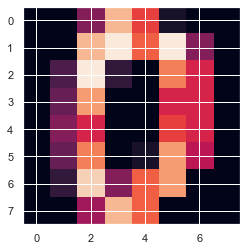

In [17]:
# 이미지 확인
plt.imshow(x_data[0].reshape(-1, 8))
plt.show()

In [19]:
# 트레인 테스트셋 구성
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, stratify=y_data, random_state=0)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

In [23]:
# 모델 생성 및 학습
pipeline = Pipeline([('std', StandardScaler()), 
                     ('mlp', MLPClassifier(hidden_layer_sizes=(100, 50,), activation='relu', solver='adam', max_iter=300))])
param_grid = {
    'mlp__alpha': [0.001, 0.01, 0.1, 0.3, 0.5, 1.0],
    'mlp__max_iter': [100, 200, 300]
}
grid_nn = GridSearchCV(pipeline, param_grid, verbose=1, scoring='accuracy')

In [24]:
grid_nn.fit(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/Users/dongja/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/dongja/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/dongja/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/dongja/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimi

/Users/dongja/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/dongja/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/dongja/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/dongja/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimi

GridSearchCV(estimator=Pipeline(steps=[('std', StandardScaler()),
                                       ('mlp',
                                        MLPClassifier(hidden_layer_sizes=(100,
                                                                          50),
                                                      max_iter=300))]),
             param_grid={'mlp__alpha': [0.001, 0.01, 0.1, 0.3, 0.5, 1.0],
                         'mlp__max_iter': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [26]:
grid_nn.best_params_

{'mlp__alpha': 0.3, 'mlp__max_iter': 300}

In [27]:
grid_nn.best_score_

0.9818984707704219

In [28]:
grid_nn.best_estimator_.get_params()

{'memory': None,
 'steps': [('std', StandardScaler()),
  ('mlp',
   MLPClassifier(alpha=0.3, hidden_layer_sizes=(100, 50), max_iter=300))],
 'verbose': False,
 'std': StandardScaler(),
 'mlp': MLPClassifier(alpha=0.3, hidden_layer_sizes=(100, 50), max_iter=300),
 'std__copy': True,
 'std__with_mean': True,
 'std__with_std': True,
 'mlp__activation': 'relu',
 'mlp__alpha': 0.3,
 'mlp__batch_size': 'auto',
 'mlp__beta_1': 0.9,
 'mlp__beta_2': 0.999,
 'mlp__early_stopping': False,
 'mlp__epsilon': 1e-08,
 'mlp__hidden_layer_sizes': (100, 50),
 'mlp__learning_rate': 'constant',
 'mlp__learning_rate_init': 0.001,
 'mlp__max_fun': 15000,
 'mlp__max_iter': 300,
 'mlp__momentum': 0.9,
 'mlp__n_iter_no_change': 10,
 'mlp__nesterovs_momentum': True,
 'mlp__power_t': 0.5,
 'mlp__random_state': None,
 'mlp__shuffle': True,
 'mlp__solver': 'adam',
 'mlp__tol': 0.0001,
 'mlp__validation_fraction': 0.1,
 'mlp__verbose': False,
 'mlp__warm_start': False}

In [31]:
# 예측
y_train_pred = grid_nn.predict(x_train)
y_test_pred = grid_nn.predict(x_test)

In [34]:
# train score
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       146
           2       1.00      1.00      1.00       142
           3       1.00      1.00      1.00       146
           4       1.00      1.00      1.00       145
           5       1.00      1.00      1.00       145
           6       1.00      1.00      1.00       145
           7       1.00      1.00      1.00       143
           8       1.00      1.00      1.00       139
           9       1.00      1.00      1.00       144

    accuracy                           1.00      1437
   macro avg       1.00      1.00      1.00      1437
weighted avg       1.00      1.00      1.00      1437



In [36]:
# test score
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      0.97      0.95        36
           2       1.00      1.00      1.00        35
           3       0.97      1.00      0.99        37
           4       1.00      0.97      0.99        36
           5       0.97      1.00      0.99        37
           6       1.00      0.97      0.99        36
           7       1.00      1.00      1.00        36
           8       0.94      0.94      0.94        35
           9       1.00      0.94      0.97        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [37]:
# test confusion matrix
pd.crosstab(y_test, y_test_pred, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,36,0,0,0,0,0,0,0,0,0
1,0,35,0,0,0,0,0,0,1,0
2,0,0,35,0,0,0,0,0,0,0
3,0,0,0,37,0,0,0,0,0,0
4,0,0,0,0,35,0,0,0,1,0
5,0,0,0,0,0,37,0,0,0,0
6,0,1,0,0,0,0,35,0,0,0
7,0,0,0,0,0,0,0,36,0,0
8,0,2,0,0,0,0,0,0,33,0


트레인 데이터에 대해 100%의 정확도를 보였고 테스트 데이터에 대해 98%의 매우 높은 정확도를 보였다